In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
#Function to implement cross validation
def implement_cross_validation_KNN(k,X,y,mean_error,std_error):
    from sklearn.neighbors import KNeighborsRegressor
    model = KNeighborsRegressor(n_neighbors=k,weights='uniform')
    temp=[]
     # implementing k-fold cross validation
    from sklearn.model_selection import KFold
    kf = KFold(n_splits=10)
    for train, test in kf.split(X):
        model.fit(X[train], y[train])
        ypred = model.predict(X[test])
        from sklearn.metrics import mean_squared_error
        temp.append(mean_squared_error(y[test],ypred))
    #Calculating mean, variance and standard deviation for RMSE    
    mean_error.append(np.array(temp).mean())
    std_error.append(np.array(temp).std())
    return model,mean_error,std_error

In [3]:
#Function to plot errorbar 
def plot_errorbar(ax,k,mean_error,std_error):
    ax.errorbar(k,mean_error,yerr=std_error,linewidth=3)
    ax.set_xlabel("kNeighbors", fontsize=18) 
    ax.set_ylabel("Mean Square Error", fontsize=18)
    ax.set_title("Errorbar Plot for KNN Regressor varying KNeigbours")
    return ax

In [4]:
#Function to plot plot training and predicted data
def plot_data_models(X,y,ax,data):
    if data=="Actual":
        ax.scatter(X,y, marker='x',c='black',s=100,label="Actual Data")
    else:
        ax.scatter(X,y,marker='*',c='red',s=50,label="Predicted Data")
    ax.set_xlabel("X", fontsize=18) 
    ax.set_ylabel("Y", fontsize=18)
    ax.set_title("Prediction and Actual Data",fontsize=18)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    return ax

In [5]:
#Function to manage legends     
def manage_legends(fig):
    handles, labels = fig.gca().get_legend_handles_labels()
    by_label = dict(zip(labels, handles)) 
    fig.legend(by_label.values(),by_label.keys(),bbox_to_anchor=(0.85, 0.85),loc=1,prop={'size':14})

In [6]:
#Main Function

#Defining penalty values and plot variables
k = [2,3,5,10,15]
mean_error=[]; std_error=[]
mean_error_c=[]; std_error_c=[]

In [7]:
# Read the data from file
df = pd.read_csv("ProcessedWeatherData.csv")
print(df.shape[1])

10


In [8]:
df.drop(columns=["station_id"],inplace = True)

In [9]:
from sklearn.preprocessing import MinMaxScaler
df_stand = MinMaxScaler().fit_transform(df.values)

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df_stand[:,:-1],df_stand[:,-1], test_size=0.2, random_state=0)

In [11]:
fig=list(range(2))
ax=list(range(2)) 

In [12]:
import time
start_time = time.time()

In [13]:
#Iterations for each value of Neighbors
for j in range(len(k)):
    model,mean_error,std_error=implement_cross_validation_KNN(k[j],X_train,y_train,mean_error,std_error)

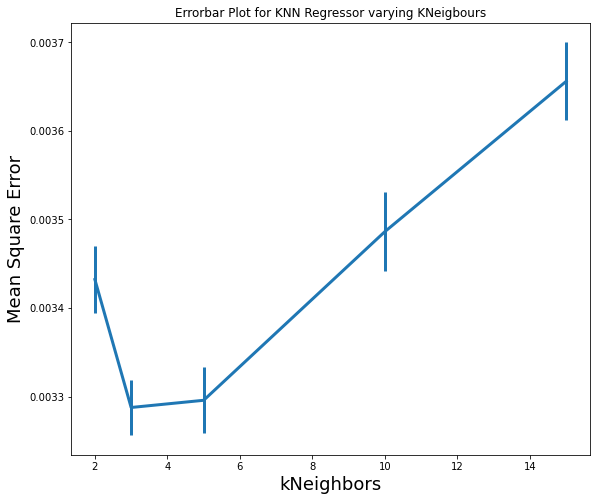

In [14]:
fig[0]=plt.figure(1, figsize=(12, 8))
ax[0]=fig[0].add_axes([0.1, 0.1, 0.6, 0.75])
ax[0]=plot_errorbar(ax[0],k,mean_error,std_error) 

In [15]:
end_time = time.time() - start_time
print(end_time)

148.17011666297913


In [16]:
finalModel,mean_error,std_error=implement_cross_validation_KNN(3,X_train,y_train,mean_error,std_error)
y_pred=finalModel.predict(X_test)

In [17]:
from sklearn.metrics import mean_squared_error
print("RMSE: ",mean_squared_error(y_test,y_pred))

RMSE:  0.0033937515866751568


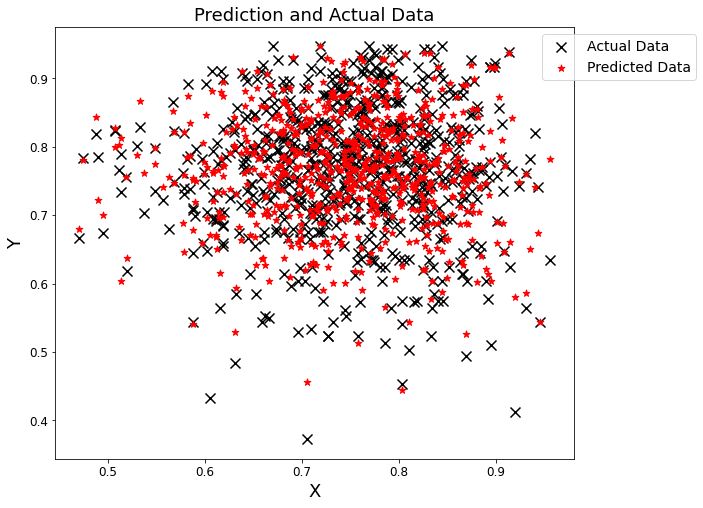

In [18]:
fig[1]=plt.figure(2, figsize=(12, 8))
ax[1]=fig[1].add_axes([0.1, 0.1, 0.6, 0.75])
ax[1]=plot_data_models(X_test[::100,0],y_test[::100],ax[1],"Actual")
ax[1]=plot_data_models(X_test[::100,0],y_pred[::100],ax[1],"Predicted")
manage_legends(fig[1])
plt.show()